<a href="https://colab.research.google.com/github/manasuii/AI-ML_Fundamentals/blob/main/TWO_LAYER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00


In [4]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
import matplotlib.pyplot as plt


In [5]:
edge_index = torch.tensor([[0,1,1,2,0,3,3,4,4,2],[1,0,2,1,3,0,4,3,2,4]], dtype=torch.long)

In [7]:
x = torch.tensor([[1.,0.,0.], [0.,1.,0.], [0.,0.,1.], [1.,1.,0.], [0.,1.,1.]])
y = torch.tensor([0, 0, 1, 1, 1], dtype=torch.long) # Labels for the 5 nodes

In [8]:
data = Data(x=x, edge_index=edge_index, y=y)

In [9]:
class SimpleGNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(3, 4)
        self.conv2 = GCNConv(4, 2) # Output 2D

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

In [10]:
model = SimpleGNN()
model.eval()
with torch.no_grad():
    out_before = model(data.x, data.edge_index)
emb_before = out_before.numpy()

In [11]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

print("Training started...")
model.train()
for epoch in range(201):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Training started...
Epoch 0, Loss: 0.9954
Epoch 50, Loss: 0.6599
Epoch 100, Loss: 0.6492
Epoch 150, Loss: 0.6266
Epoch 200, Loss: 0.5929


In [12]:
model.eval()
with torch.no_grad():
    out_after = model(data.x, data.edge_index)
emb_after = out_after.numpy()

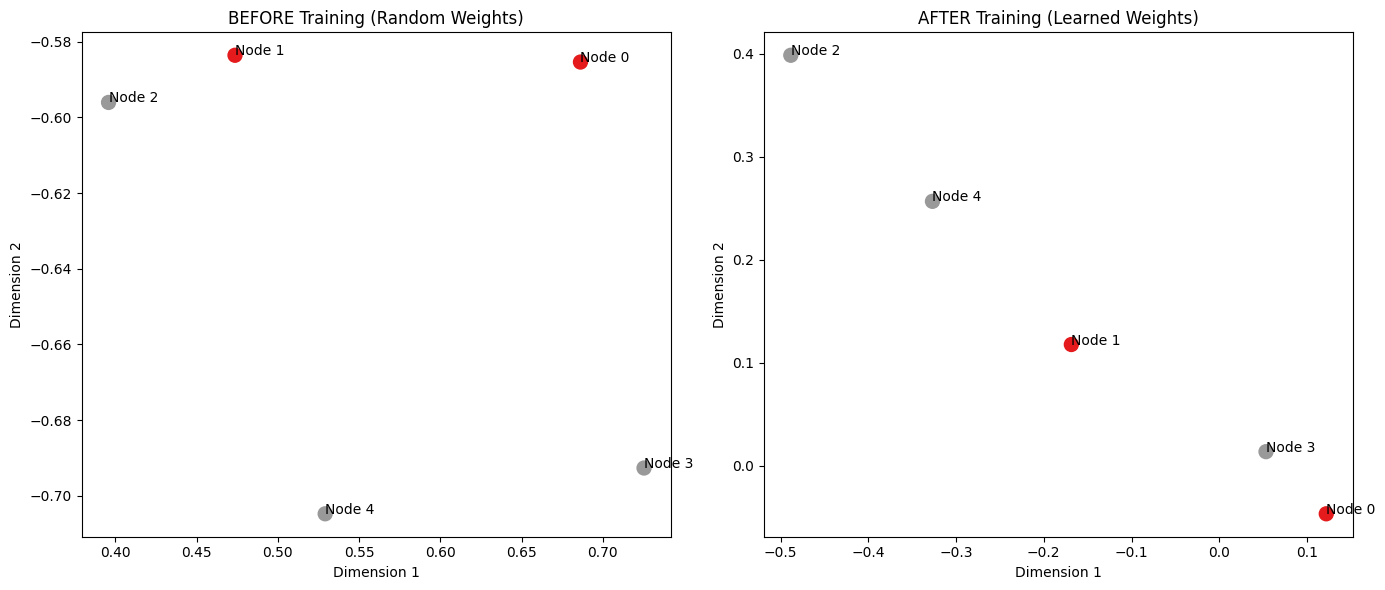

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Before
ax1.scatter(emb_before[:, 0], emb_before[:, 1], c=data.y, cmap='Set1', s=100)
for i in range(len(emb_before)):
    ax1.text(emb_before[i, 0], emb_before[i, 1], f"Node {i}")
ax1.set_title("BEFORE Training (Random Weights)")
ax1.set_xlabel("Dimension 1")
ax1.set_ylabel("Dimension 2")

# Plot After
ax2.scatter(emb_after[:, 0], emb_after[:, 1], c=data.y, cmap='Set1', s=100)
for i in range(len(emb_after)):
    ax2.text(emb_after[i, 0], emb_after[i, 1], f"Node {i}")
ax2.set_title("AFTER Training (Learned Weights)")
ax2.set_xlabel("Dimension 1")
ax2.set_ylabel("Dimension 2")

plt.tight_layout()
plt.show()

